In [67]:
# ref: https://github.com/ML-KULeuven/socceraction/blob/master/public-notebooks/1-load-and-convert-statsbomb-data.ipynb
import os
import warnings
import pandas as pd
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings(action="ignore", message="credentials were not supplied. open data access only")

In [68]:
from socceraction.data.statsbomb import StatsBombLoader

In [69]:
SBL = StatsBombLoader()

In [70]:
SBL.competitions()

,season_id,competition_id,competition_name,country_name,competition_gender,season_name
0,4,16,Champions League,Europe,male,2018/2019
1,1,16,Champions League,Europe,male,2017/2018
2,2,16,Champions League,Europe,male,2016/2017
3,27,16,Champions League,Europe,male,2015/2016
4,26,16,Champions League,Europe,male,2014/2015
5,25,16,Champions League,Europe,male,2013/2014
6,24,16,Champions League,Europe,male,2012/2013
7,23,16,Champions League,Europe,male,2011/2012
8,22,16,Champions League,Europe,male,2010/2011
9,21,16,Champions League,Europe,male,2009/2010


In [38]:
games = SBL.games(competition_id=43, season_id=106)
games

,game_id,season_id,competition_id,competition_stage,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,referee
0,3857256,106,43,Group Stage,3,2022-12-02 21:00:00,786,773,2,3,Stadium 974,Fernando Andrés Rapallini
1,3869151,106,43,Round of 16,4,2022-12-03 21:00:00,779,792,2,1,Ahmad bin Ali Stadium,Szymon Marciniak
2,3857257,106,43,Group Stage,3,2022-11-30 17:00:00,792,776,1,0,Al Janoub Stadium,Mustapha Ghorbal
3,3857258,106,43,Group Stage,1,2022-11-24 21:00:00,781,786,2,0,Lusail Stadium,Alireza Faghani
4,3857288,106,43,Group Stage,2,2022-11-26 12:00:00,777,792,0,1,Al Janoub Stadium,Daniel Siebert
...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,106,43,Group Stage,1,2022-11-22 18:00:00,794,789,0,0,Stadium 974,Chris Beath
60,3857262,106,43,Group Stage,3,2022-12-02 17:00:00,791,780,2,1,Education City Stadium,Facundo Tello Figueroa
61,3857261,106,43,Group Stage,3,2022-11-29 21:00:00,907,768,0,3,Ahmad bin Ali Stadium,Slavko Vinčić
62,3857255,106,43,Group Stage,3,2022-12-01 21:00:00,778,772,2,1,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes


In [77]:
SBL.teams(3857256)

,team_id,team_name
0,773,Switzerland
1,786,Serbia


In [104]:
team_dic = {}
for game_id in games['game_id']:
    df_game_team = SBL.teams(game_id)
    team_dic[df_game_team.iloc[0,0]] = df_game_team.iloc[0,1]
    team_dic[df_game_team.iloc[1,0]] = df_game_team.iloc[1,1]
df_team = pd.DataFrame.from_dict(team_dic, orient='index')
df_team

32
{773: 'Switzerland', 786: 'Serbia', 779: 'Argentina', 792: 'Australia', 776: 'Denmark', 781: 'Brazil', 777: 'Tunisia', 787: 'Senegal', 3565: 'Ecuador', 941: 'Netherlands', 791: 'South Korea', 783: 'Uruguay', 780: 'Portugal', 788: 'Morocco', 771: 'France', 799: 'Saudi Arabia', 794: 'Mexico', 789: 'Poland', 3566: 'Qatar', 768: 'England', 785: 'Croatia', 772: 'Spain', 778: 'Japan', 1839: 'United States', 770: 'Germany', 2722: 'Cameroon', 795: 'Costa Rica', 782: 'Belgium', 907: 'Wales', 4885: 'Ghana', 1833: 'Canada', 797: 'Iran'}


,0
773,Switzerland
786,Serbia
779,Argentina
792,Australia
776,Denmark
781,Brazil
777,Tunisia
787,Senegal
3565,Ecuador
941,Netherlands


In [36]:
df_events = SBL.events(game_id=7548)

In [39]:
import socceraction.spadl as spadl

In [46]:
df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=781) # Brazil

In [47]:
df_actions.shape

(2198, 14)

In [65]:
df_actions.columns

Index(['game_id', 'original_event_id', 'period_id', 'time_seconds', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'type_id',
       'result_id', 'bodypart_id', 'action_id', 'type_name', 'result_name',
       'bodypart_name', 'team_name', 'player_name', 'nickname',
       'jersey_number', 'is_starter', 'starting_position_id',
       'starting_position_name', 'minutes_played'],
      dtype='object')

In [66]:
df_actions.head(5)

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,team_name,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
0,7548,c6758a85-e41e-430c-85f0-8646bfc26f31,1,1.0,795,5586.0,52.058824,34.430380,87.352941,33.569620,0,1,5,0,pass,success,foot_right,Costa Rica,Marcos Danilo Ureña Porras,Marcos Ureña,21,True,23,Center Forward,54
1,7548,1df25d7b-81eb-42c7-9508-5ac982da84ee,1,3.0,795,5597.0,87.352941,33.569620,84.705882,38.734177,21,1,0,1,dribble,success,foot,Costa Rica,Keylor Navas Gamboa,Keylor Navas,1,True,1,Goalkeeper,99
2,7548,dc30de29-8e5a-43e3-9a14-176fe177b45f,1,5.0,795,5597.0,84.705882,38.734177,27.352941,51.645570,0,0,5,2,pass,fail,foot_right,Costa Rica,Keylor Navas Gamboa,Keylor Navas,1,True,1,Goalkeeper,99
3,7548,90e2af19-d896-43dd-bbfb-ce321b77a6f2,1,8.0,781,5539.0,29.117647,49.924051,30.000000,49.924051,0,0,0,3,pass,fail,foot,Brazil,Carlos Henrique Casimiro,Casemiro,5,True,10,Center Defensive Midfield,99
4,7548,NaN,1,9.0,781,5542.0,30.000000,49.924051,30.882353,45.620253,21,1,0,4,dribble,success,foot,Brazil,José Paulo Bezzera Maciel Júnior,Paulinho,15,True,13,Right Center Midfield,68


In [50]:
df_actions = (
  spadl
  .add_names(df_actions)  # add actiontype and result names
  .merge(SBL.teams(game_id=7548), how='left')  # add team names
  .merge(SBL.players(game_id=7548), how='left')  # add player names
)

In [54]:
df_actions.shape

(2198, 25)

In [59]:
# 「ゴール」を抽出
df_actions[(df_actions['type_name'] == 'shot') & (df_actions['result_name'] == 'success')]

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,team_name,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
2052,7548,9b36fcef-3875-48e8-8299-3cfc0fa1d509,2,2723.0,781,3501.0,98.823529,36.151899,105.0,35.377215,11,1,5,2052,shot,success,foot_right,Brazil,Philippe Coutinho Correia,Philippe Coutinho,11,True,15,Left Center Midfield,99
2195,7548,b7728f99-998f-46c8-8ea3-0595ba54eeb2,2,3105.0,781,4320.0,100.588235,32.708861,105.0,37.356962,11,1,4,2195,shot,success,foot_left,Brazil,Neymar da Silva Santos Junior,Neymar,10,True,21,Left Wing,99


↑ indexは、、、必ずしも時間順じゃないのか

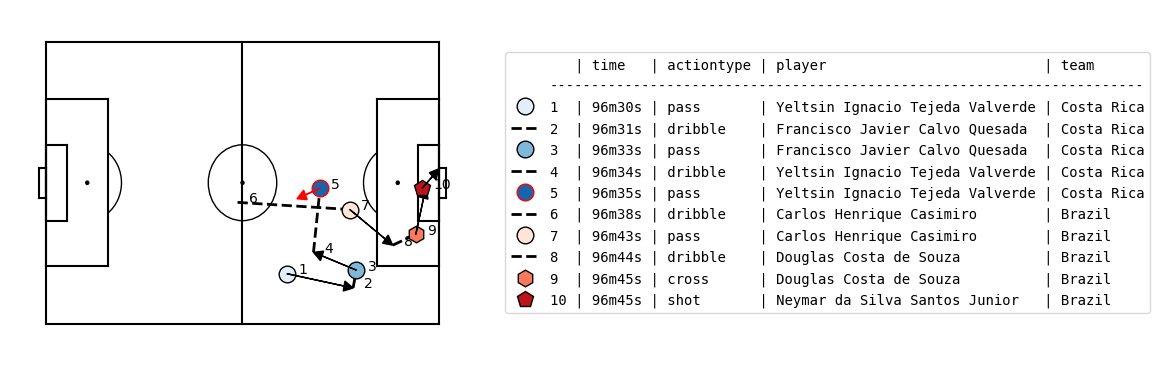

In [105]:
import matplotsoccer

shot =  # コウチーニョの先制ゴール
a = df_actions[shot-9:shot+1].copy()

# skip "Print the game date and timestamp of the goal"

def nice_time(row):
    minute = int((row.period_id-1)*45 +row.time_seconds // 60)
    second = int(row.time_seconds % 60)
    return f"{minute}m{second}s"

a["nice_time"] = a.apply(nice_time, axis=1)
labels = a[["nice_time", "type_name", "player_name", "team_name"]]

ax = matplotsoccer.actions(
    location=a[["start_x", "start_y", "end_x", "end_y"]],
    action_type=a.type_name,
    team= a.team_name,
    result= a.result_name == "success",
    label=labels,
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False,
    figsize=6
)